In [14]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel('VEF.xls')
print(df)

        Id  Edad    VEF  Altura(pulgadas)  Sexo  Fumador
0      301     9  1.708              57.0     0        0
1      451     8  1.724              67.5     0        0
2      501     7  1.720              54.5     0        0
3      642     9  1.558              53.0     1        0
4      901     9  1.895              57.0     1        0
5     1701     8  2.336              61.0     0        0
6     1752     6  1.919              58.0     0        0
7     1753     6  1.415              56.0     0        0
8     1901     8  1.987              58.5     0        0
9     1951     9  1.942              60.0     0        0
10    1952     6  1.602              53.0     0        0
11    2001     8  1.735              54.0     1        0
12    2101     8  2.193              58.5     0        0
13    2401     8  2.118              60.5     1        0
14    3102     8  2.258              58.0     1        0
15    3142     7  1.932              53.0     1        0
16    3541     5  1.472        

In [16]:
df2 = (df[['Edad','VEF', 'Sexo', 'Fumador']])

#lista del fev de personas con sexo 0, fumador 0 y edad en el rango
gender= (df2['Sexo'])
smoker= (df2['Fumador'])
fev= (df2['VEF'])
age= (df2['Edad'])
lista = []
for i in range(len(df2)):
    g = gender[i]
    s = smoker[i]
    f = fev[i]
    a = age[i]
    if g == int(0) and s == int(0):
        if a>=10 and a<=14:
            lista.append(f)
#print(lista)

        

In [17]:
media_lista = np.mean(lista)
print(media_lista)

2.83722807018


In [18]:
def get_VEF(df2, sexo, fumador):
    gender= (df2['Sexo'])
    smoker= (df2['Fumador'])
    fev= (df2['VEF'])
    age= (df2['Edad'])
    lista = []
    for i in range(len(df2)):
        g = gender[i]
        s = smoker[i]
        f = fev[i]
        a = age[i]
        if g == int(sexo) and s == int(fumador):
            if a>=10 and a<=14:
                lista.append(f)
    return (lista)

vef_chicos_fumadores= (get_VEF(df2, 1, 1))
vef_chicos_nofumadores= (get_VEF(df2, 1, 0))
vef_chicas_fumadoras= (get_VEF(df2, 0, 1))
vef_chicas_nofumadoras= (get_VEF(df2, 0, 0))

print(vef_chicos_fumadores)
print(vef_chicos_nofumadores)

[1.694, 3.9569999999999999, 4.7889999999999997, 4.7560000000000002, 4.3090000000000002, 3.343, 3.7509999999999999, 2.3039999999999998, 3.4980000000000002, 2.2759999999999998, 4.6369999999999996, 3.339, 4.0449999999999999, 4.7629999999999999]
[2.8839999999999999, 2.3279999999999998, 3.3809999999999998, 3.4700000000000002, 1.8109999999999999, 2.524, 3.7410000000000001, 4.3360000000000003, 4.8419999999999996, 4.5499999999999998, 2.5609999999999999, 2.4809999999999999, 3.2029999999999998, 3.5489999999999999, 3.222, 3.1110000000000002, 2.2919999999999998, 2.246, 1.9370000000000001, 2.6459999999999999, 2.9569999999999999, 4.0069999999999997, 3.2509999999999999, 4.3049999999999997, 3.9060000000000001, 3.5830000000000002, 3.4359999999999999, 3.0579999999999998, 3.0070000000000001, 3.4889999999999999, 4.6829999999999998, 2.3519999999999999, 3.1080000000000001, 3.9940000000000002, 4.3929999999999998, 2.5920000000000001, 3.1930000000000001, 3.5150000000000001, 2.7200000000000002, 2.46300000000000

3.67578571429


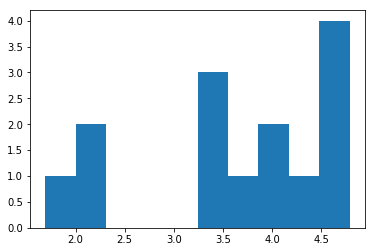

In [19]:
mean_chicos_fumadores= np.mean(vef_chicos_fumadores)
print (mean_chicos_fumadores)

plt.hist(vef_chicos_fumadores)
plt.show()

3.24809929078


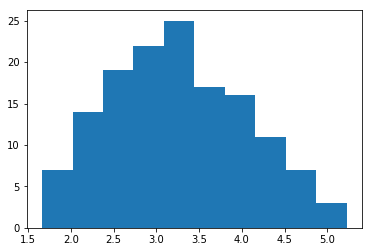

In [20]:
mean_chicos_nofumadores= np.mean(vef_chicos_nofumadores)
print (mean_chicos_nofumadores)

plt.hist(vef_chicos_nofumadores)
plt.show()

3.02322222222


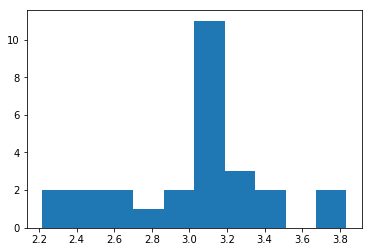

In [21]:
mean_chicas_fumadoras= np.mean(vef_chicas_fumadoras)
print(mean_chicas_fumadoras)

plt.hist(vef_chicas_fumadoras)
plt.show()

2.83722807018


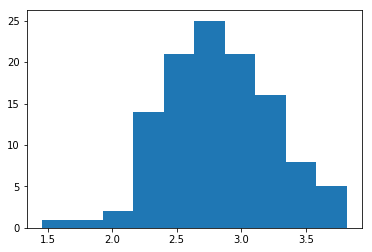

In [22]:
mean_chicas_nofumadoras= np.mean(vef_chicas_nofumadoras)
print(mean_chicas_nofumadoras)


plt.hist(vef_chicas_nofumadoras)
plt.show()

In [23]:
vef_chicas_fumadoras= (get_VEF(df2, 0, 1)) #1 vef_chicas_fumadoras
vef_chicas_nofumadoras= (get_VEF(df2, 0, 0)) #2

n_1 = len(vef_chicas_fumadoras)
n_2 = len(vef_chicas_nofumadoras)

s_1 = ss.sem(vef_chicas_fumadoras)*np.sqrt(n_1)
s_2 = ss.sem(vef_chicas_nofumadoras)*np.sqrt(n_2)


In [24]:
print(n_2)

114


In [25]:
s = np.sqrt(((n_1-1)*s_1 + (n_2-1)*s_2)/n_1+n_2-2)

In [26]:
x1_barra = np.mean(vef_chicas_fumadoras)
x2_barra = np.mean(vef_chicas_nofumadoras)

t = (x1_barra - x2_barra)/(s*np.sqrt(1/n_1+1/n_2))

In [27]:
print(t)

0.0813229324201


In [28]:
alpha = 0.05
if t > ss.t.ppf(1-alpha/2, n_1+n_2 - 2) or t < - ss.t.ppf(1-alpha/2, n_1+n_2 -2):
    print("Rechazamos H_0")
else:
    print("Aceptamos H_0")

Aceptamos H_0
